# 🎶 Predicting Lyrics
<hr>
<br>
<b> Group name: <strike>AA</strike> <i>My Machine Learning Romance</i> </b> <br>
- Fiorella Tenorio <br>
- Katja Wittfoth <br>
- Rebecca Reilly <br>
- Victoria Suarez <br>
- Viviana Márquez <br>

<br>
<img src='USF.png', style="width:200px;" align="left">
Friday, December 7th, 2018. <br>
<b> MSDS 621 </b> - Introduction to Machine Learning 

## Goal 
<center>
    <big>🏆<br>
    Predict genre based on lyrics</big><br><br>
</center> 

## Agenda
- Introduction to our dataset
- Supervised learning
- Unsupervised learning
- <i>Are you smarter than a ML algorithm?</i>

## Workflow Pipeline
<center>
    <img src="workflow3.png" style="height:500px">
</center> 

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('../lyrics.csv')

In [3]:
# Clean data
def clean_lyrics(text):
    text = re.sub('\n', ' ', text)  # removes new lines
    text = re.sub('\d', '', text)  # removes numbers
    text = re.sub('\t', '', text)  # removes tabs
    text = re.sub('[^A-Za-z ]', '', text)  # removes special character
    text = re.sub('\[Verse\s*\d*:]', ' ', text)  # remove verse indicators
    text = re.sub('\s+', ' ', text)
    words = text.split(" ")
    words = [w for w in words if len(w) > 2]  # removes a, an, to, at, be, ...
    return ' '.join(words)


df = df[pd.notnull(df['lyrics'])]
df = df[df['genre'] != 'Not Available']
df = df[df['genre'] != 'Other']
df['lyrics_clean'] = df.lyrics.apply(clean_lyrics)

df_clean = df[(df.genre == 'Country') | (df.genre == 'Metal') |
              (df.genre == 'Hip-Hop') | (df.genre == 'Jazz') | (df.genre == 'Electronic')]

df_clean = df_clean.sample(frac=1)  # shuffle

## 📊 Get data and pre-process

- 380,000+ lyrics  from MetroLyrics in <a href="https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics">Kaggle</a>

#### 🛁 Cleaning 
- Remove: `Null` lyrics, "Not available" genre, punctuation, numbers, symbols, spaces, stop words.
- Shuffle data.
- **Genres**: Country, Metal, Hip-Hop, Jazz, Electronic.

In [4]:
df_clean.head()

,index,song,year,artist,genre,lyrics,lyrics_clean
287074,287074,nah,2014,bow-wow,Hip-Hop,[Stunt-tro]\nsittin in the ride spitting fact\...,Stunttro sittin the ride spitting fact Verse f...
97644,97644,it-s-lonely-i-can-t-stand,2008,charlie-major,Country,I took the long way home tonight down a lonely...,took the long way home tonight down lonely roa...
108949,108949,get-doe,2006,esham,Hip-Hop,"[Chorus]\nAll I know, get doe (keep gettin tha...",Chorus All know get doe keep gettin that doe F...
194510,194510,erblindet,2016,bonez-mc,Hip-Hop,Auf der Suche nach Stress in der City\nDressco...,Auf der Suche nach Stress der City Dresscode S...
54211,54211,borrow-yo-broad,2007,e-40,Hip-Hop,Beeyatch!\nIt's a fool 'cause I'm in Texas-Ark...,Beeyatch Its fool cause TexasArkana right seen...


## Summary of Data

In [5]:
df_clean.groupby('genre').count()

,index,song,year,artist,lyrics,lyrics_clean
genre,,,,,,
Country,14387,14387,14387,14387,14387,14387
Electronic,7966,7966,7966,7966,7966,7966
Hip-Hop,24850,24850,24850,24850,24850,24850
Jazz,7971,7970,7971,7971,7971,7971
Metal,23759,23759,23759,23759,23759,23759


<center>
    <img src="pie.png" style="height:500px;">
</center> 

## 👠 Modeling

### ✂️ Splitting data

In [6]:
train, test = train_test_split(df_clean, test_size=0.2)
train_lyrics = train['lyrics_clean']
train_genre = train['genre']
test_lyrics = test['lyrics_clean']
test_genre = test['genre']

### 📊 Supervised models

- Pipelines: 
   - Vectorizers: CountVectorizer, TfidfVectorizer
   - Estimators: MultinomialNB, LogisticRegression, LinearSVC

- GridSearch

In [7]:
pipe_lr_cv = Pipeline([
    ('cv', CountVectorizer(stop_words='english',
                           lowercase=False,
                           analyzer='word')),
    ('lr', LogisticRegression())
])

pipe_lr_tf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                              lowercase=False,
                              analyzer='word')),
    ('lr', LogisticRegression())
])

pipe_nb_cv = Pipeline([
    ('cv', CountVectorizer(stop_words='english',
                           lowercase=False,
                           analyzer='word')),
    ('nb', MultinomialNB())
])

pipe_nb_tf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                              lowercase=False,
                              analyzer='word')),
    ('nb', MultinomialNB())
])

pipe_svc_cv = Pipeline([
    ('cv', CountVectorizer(stop_words='english',
                           lowercase=False,
                           analyzer='word')),
    ('svc', LinearSVC())
])

pipe_svc_tf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                              lowercase=False,
                              analyzer='word')),
    ('svc', LinearSVC())
])

pipelines = [pipe_lr_cv, pipe_lr_tf, pipe_nb_cv,
             pipe_nb_tf, pipe_svc_cv, pipe_svc_tf]

In [8]:
# Fit pipe
for pipe in pipelines:
    pipe.fit(train_lyrics, train_genre)

In [9]:
methods = []

for pipe in pipelines:
    name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
    vect = pipe.steps[0][1].__class__.__name__.split('.')[-1]

    predicted = pipe.predict(test_lyrics)
    accuracy = accuracy_score(predicted, test['genre'])
    conf_mat = confusion_matrix(test['genre'], predicted)

    methods.append([name, vect, accuracy, conf_mat])

methods = pd.DataFrame(methods)
methods.columns = ['Model', 'Vectorizer', 'Accuracy', "Confussion_Matrix"]
methods["Strategy"] = methods["Model"] + " -- " + methods["Vectorizer"]
methods.set_index(["Strategy"], inplace=True)

### Pipelines

In [10]:
methods[["Model", "Vectorizer", "Accuracy"]]

,Model,Vectorizer,Accuracy
Strategy,,,
LogisticRegression -- CountVectorizer,LogisticRegression,CountVectorizer,0.767910
LogisticRegression -- TfidfVectorizer,LogisticRegression,TfidfVectorizer,0.762209
MultinomialNB -- CountVectorizer,MultinomialNB,CountVectorizer,0.729081
MultinomialNB -- TfidfVectorizer,MultinomialNB,TfidfVectorizer,0.618294
LinearSVC -- CountVectorizer,LinearSVC,CountVectorizer,0.728828
LinearSVC -- TfidfVectorizer,LinearSVC,TfidfVectorizer,0.779375


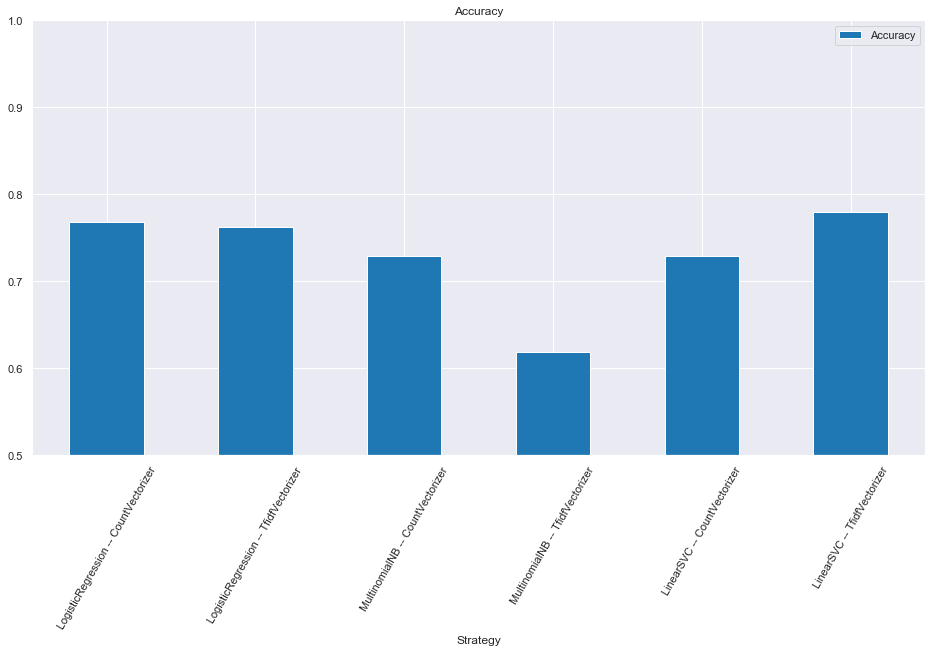

In [11]:
# %matplotlib inline
methods.plot(figsize=(16, 8), kind='bar', title='Accuracy',
             rot=60, ylim=(0.5, 1), colormap='tab10')

In [12]:
def plot_conf_mat(methods):
    """input: data frame with confussion matrix information
    output: plot it"""
    methods = methods.reset_index()
    fig = plt.figure(figsize=(20, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i in range(1, 7):
        ax = fig.add_subplot(2, 3, i)
        sns.heatmap(methods["Confussion_Matrix"].values[i-1],
                    annot=True, fmt='d', ax=ax, cmap="Blues")
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix {methods["Strategy"].values[i-1]}')
        ax.xaxis.set_ticklabels(df_clean.genre.unique(), rotation=60)
        ax.yaxis.set_ticklabels(df_clean.genre.unique(), rotation=60)

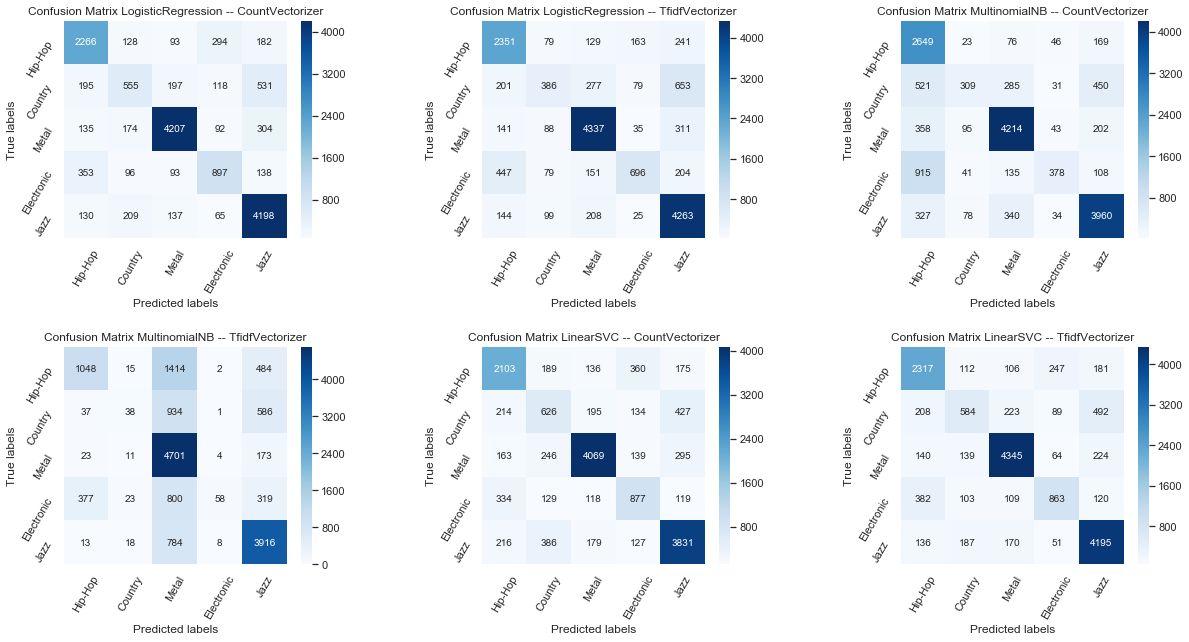

In [13]:
plot_conf_mat(methods)

### Grid Search

In [14]:
grid = {'svc__loss': ['hinge', 'squared_hinge']}

gs = GridSearchCV(pipe_svc_tf,
                  param_grid=grid,
                  scoring='accuracy')

In [15]:
gs.fit(train_lyrics, train_genre)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__loss': ['hinge', 'squared_hinge']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [16]:
gs.cv_results_

{'mean_fit_time': array([26.91216469, 10.78085891]),
 'std_fit_time': array([1.06720828, 0.23182137]),
 'mean_score_time': array([3.72625502, 3.38923677]),
 'std_score_time': array([0.07540128, 0.27462763]),
 'param_svc__loss': masked_array(data=['hinge', 'squared_hinge'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__loss': 'hinge'}, {'svc__loss': 'squared_hinge'}],
 'split0_test_score': array([0.7639905, 0.7664133]),
 'split1_test_score': array([0.76914671, 0.76947929]),
 'split2_test_score': array([0.765916  , 0.77042949]),
 'mean_test_score': array([0.766351  , 0.76877395]),
 'std_test_score': array([0.00212738, 0.00171379]),
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_train_score': array([0.89006081, 0.94529171]),
 'split1_train_score': array([0.889876 , 0.9460782]),
 'split2_train_score': array([0.88930591, 0.946387  ]),
 'mean_train_score': array([0.88974757, 0.94591897]),
 'std_train_score': array([0.00032

In [17]:
gs.best_estimator_.steps[0][1]  # best model

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [18]:
pred = gs.predict(test_lyrics)

In [19]:
accuracy = accuracy_score(pred, test_genre)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7794


#### 🤓 Random Forest with Feature Union

In [20]:
df_sample = df.sample(n=100000)  # sample because it takes too long to run

df_sample = df_sample[pd.notnull(df_sample['lyrics'])]
df_sample = df_sample[df_sample['genre'] != 'Not Available']
df_sample = df_sample[df_sample['genre'] != 'Other']
df_sample['lyrics_clean'] = df_sample.lyrics.apply(clean_lyrics)

df_clean = df_sample[(df_sample.genre == 'Country') | (df_sample.genre == 'Metal') |
                     (df_sample.genre == 'Hip-Hop') | (df_sample.genre == 'Jazz') | (df_sample.genre == 'Electronic')]

In [21]:
X, y = df_clean['lyrics'], df_clean['genre']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Refactor from http://michelleful.github.io/code-blog/2015/06/20/pipelines/
class Polarity(BaseEstimator, TransformerMixin):
    """Takes in the lyrics column and outputs polarity score"""

    def __init__(self):
        pass

    def sent_score(self, song):
        """Helper code to compute sentiment"""
        sid = SentimentIntensityAnalyzer()
        if type(song) is str:
            return sid.polarity_scores(", ".join(song.split("\n")))['compound']
        else:
            return 0

    def transform(self, X, y=None):
        """Transform function of this feature extractor"""
        return np.array(X.apply(self.sent_score)).reshape(-1, 1)

    def fit(self, X, y=None):
        """Returns `self` unless there is other functions in train and test"""
        return self

In [24]:
# Refactor from http://michelleful.github.io/code-blog/2015/06/20/pipelines/
class AverageWordLength(BaseEstimator, TransformerMixin):
    """Takes in the lyrics column and outputs average word length"""

    def __init__(self):
        pass

    def average_word_length(self, song):
        """Helper code to compute average word length"""
        return np.mean([len(w) for w in clean_lyrics(song).split(" ")])

    def transform(self, X, y=None):
        """Transform function of this feature extractor"""
        return np.array(X.apply(self.average_word_length)).reshape(-1, 1)

    def fit(self, X, y=None):
        """Returns `self` unless there is other functions in train and test"""
        return self

In [25]:
# features:
countVectorizer = ('vect', CountVectorizer(
    stop_words='english', lowercase=True, analyzer='word'))
tfidf = ('tfidf', TfidfVectorizer())
polarity = ('polarity', Polarity())
avg_len = ('avg_len', AverageWordLength())

In [26]:
# pipe this features into the pipeline and FeatureUnion
pipeline = Pipeline([
    ('feats', FeatureUnion([avg_len, polarity, countVectorizer])),
    ('clf', RandomForestClassifier(n_estimators=200, n_jobs=-1))
])

In [27]:
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

In [28]:
accuracy_score(pred, y_test)
print(f"Accuracy: {accuracy_score(pred, y_test):.4f}")

Accuracy: 0.7449


# 🏆 Winner supervised model: 

`LinearSVC() with TfidfVectorizer()`

## 🤔 Unsupervised model

- KMeans

In [29]:
# we create the vectorizer
tfidf = TfidfVectorizer(stop_words='english',
                        tokenizer=lambda x: x.split())

# we fit the train data
tf_features = tfidf.fit_transform(train.lyrics_clean)

# and we transform the test data
test_features = tfidf.transform(test.lyrics_clean)

In [30]:
# now, we fit the model
true_k = 11
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_features)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 dont
 know
 youre
 want
 just
 let
 time
 say
 need
 love
Cluster 1:
 instrumental
 lyrics
 song
 score
 album
 track
 september
 intro
 sorry
 music
Cluster 2:
 love
 just
 ive
 ill
 heart
 time
 way
 day
 like
 know
Cluster 3:
 nigga
 niggas
 shit
 fuck
 like
 bitch
 aint
 got
 dont
 know
Cluster 4:
 que
 ich
 und
 der
 die
 das
 ist
 nicht
 ein
 mich
Cluster 5:
 like
 got
 aint
 dont
 yeah
 know
 cause
 just
 shit
 man
Cluster 6:
 like
 just
 dont
 come
 man
 know
 got
 love
 time
 youre
Cluster 7:
 baby
 girl
 love
 know
 dont
 want
 just
 got
 wanna
 like
Cluster 8:
 life
 death
 world
 blood
 eyes
 light
 soul
 pain
 time
 die
Cluster 9:
 away
 far
 day
 time
 just
 dont
 ill
 say
 love
 know
Cluster 10:
 love
 know
 heart
 just
 dont
 ill
 youre
 like
 let
 want


Prediction


<center>
    <img src="KMeans_Result.png">
</center> 

<center>
    <big>🇺🇸 &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; 
        &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;
         🇺🇸 &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; 
        &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; 
         🇪🇸 &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;
        &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; 
         🇩🇪 &nbsp;&nbsp;&nbsp;  </big>
</center> 

<center>
    <img src="are you smarter.png">
    <big>
    🥊 LinearSVC vs Humans 🥊
    </big>
</center>

In [31]:
def predictor(string, train=train['lyrics_clean'], model=pipe_svc_tf):
    """given a string predict a genre based on the lyrics and best trained model (or a given ones). 
    """
    pred = model.predict([clean_lyrics(string)])
    return list(pred)

In [32]:
mystery1 = """Got a little boom in my big truck
Gonna open up the doors and turn it up
Gonna stomp my boots in the Georgia mud
Gonna watch you make me fall in love
Get up on the hood of my daddy's tractor
Up on the tool box, it don't matter
Down on the tailgate
Girl I can't wait
To watch you do your thing
"""

In [ ]:
predictor(mystery1)

In [34]:
mystery2 = """Oh, sometimes
I get a good feeling, yeah
Get a feeling that I never, 
never, never, never had before, no no
I get a good feeling, yeah
"""

In [ ]:
predictor(mystery2)

In [36]:
mystery3 = """I can't tell you what it really is
I can only tell you what it feels like
And right now there's a steel knife, in my windpipe
I can't breathe, but I still fight, while I can fight
As long as the wrong feels right, it's like I'm in flight
"""

In [ ]:
predictor(mystery3)

<center>
    <img src="bitmojis.png" style="height:600px;">
</center>

In [38]:
people = ['Rebecca pick-up truck Reilly', "Ekaterina money Wittfoth",
          "Fiorella blues Tenorio", "Viviana hyper Márquez"]
for person in people:
    print(f"{person}: {predictor(person)}")

Rebecca pick-up truck Reilly: ['Country']
Ekaterina money Wittfoth: ['Hip-Hop']
Fiorella blues Tenorio: ['Jazz']
Viviana hyper Márquez: ['Electronic']


# Recap ✍️

- We used data on lyrics to predict five genres
- We tried four supervised algorithms
- Concluded that the best one is LinearSVC
- Unsupervised learning showed us that language was the most important feature

# Fun fact
<center>
<img src = "article1.png" style="height:270px;">
<img src = "article2.png" style="height:270px;">
</center>

# Questions

In [39]:
person = "Victoria Suarez"
print(f"{person}: {predictor(person)}")

Victoria Suarez: ['Metal']


<center><img src="bitmoji_victoria.png" style="height:500px;"></center>

# ❓ [Real] Questions

Github: https://github.com/r-reilly/MSDS621_Project